In [47]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import auc, roc_curve, classification_report

import h2o
from h2o.frame import H2OFrame
from h2o.estimators.random_forest import H2ORandomForestEstimator

from sklearn.feature_selection import chi2,f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,roc_curve,precision_score,recall_score,auc,precision_recall_curve
from sklearn.model_selection import train_test_split
import xgboost as xgb

%matplotlib inline

In [2]:
os.getcwd()

'/Users/Daniel1020/Documents/Business Analytics/Python/Project'

In [4]:
os.chdir('/Users/Daniel1020/Downloads/email')

In [5]:
email_opened_table=pd.read_csv('email_opened_table.csv')
email_table= pd.read_csv('email_table.csv')
link_clicked_table= pd.read_csv('link_clicked_table.csv')

In [6]:
email_table.info()
email_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
email_id               100000 non-null int64
email_text             100000 non-null object
email_version          100000 non-null object
hour                   100000 non-null int64
weekday                100000 non-null object
user_country           100000 non-null object
user_past_purchases    100000 non-null int64
dtypes: int64(3), object(4)
memory usage: 5.3+ MB


,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases
0,85120,short_email,personalized,2,Sunday,US,5
1,966622,long_email,personalized,12,Sunday,UK,2
2,777221,long_email,personalized,11,Wednesday,US,2
3,493711,short_email,generic,6,Monday,UK,1
4,106887,long_email,generic,14,Monday,US,6


In [7]:
email_opened_table.info()
email_opened_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10345 entries, 0 to 10344
Data columns (total 1 columns):
email_id    10345 non-null int64
dtypes: int64(1)
memory usage: 80.9 KB


,email_id
0,284534
1,609056
2,220820
3,905936
4,164034


In [8]:
link_clicked_table.head()

,email_id
0,609056
1,870980
2,935124
3,158501
4,177561


In [9]:
## check the unique email_id in three tables
print('id is email table is :\t',len(email_table['email_id'].unique()))
print ("id number in email_open table is : \t",len(email_opened_table['email_id'].unique()))
print("id number in link_click table is : \t", len(link_clicked_table['email_id'].unique()))

id is email table is :	 100000
id number in email_open table is : 	 10345
id number in link_click table is : 	 2119


# Data Processing

In [10]:
email_opened_table['open']=1
link_clicked_table['click']=1

In [11]:
data = pd.merge(left= email_table, right=email_opened_table, how='left', on='email_id')
data = pd.merge(left=data, right=link_clicked_table,how='left',on='email_id')
data=data.fillna(value=0)
data['open']=data['open'].astype(int)
data['click']=data['click'].astype(int)

In [30]:
data.head()

,email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
0,85120,short_email,personalized,2,Sunday,US,5,0,0
1,966622,long_email,personalized,12,Sunday,UK,2,1,1
2,777221,long_email,personalized,11,Wednesday,US,2,0,0
3,493711,short_email,generic,6,Monday,UK,1,0,0
4,106887,long_email,generic,14,Monday,US,6,0,0


# Question 1

In [12]:
print('{0:25s} {1:>8.4f}%'.format('Opened user percentage:', data['open'].mean() * 100))
print('{0:25s} {1:>8.4f}%'.format('Clicked user percentage:', data['click'].mean() * 100))

Opened user percentage:    10.3450%
Clicked user percentage:    2.1190%


# Question 2

## Email_text visualization

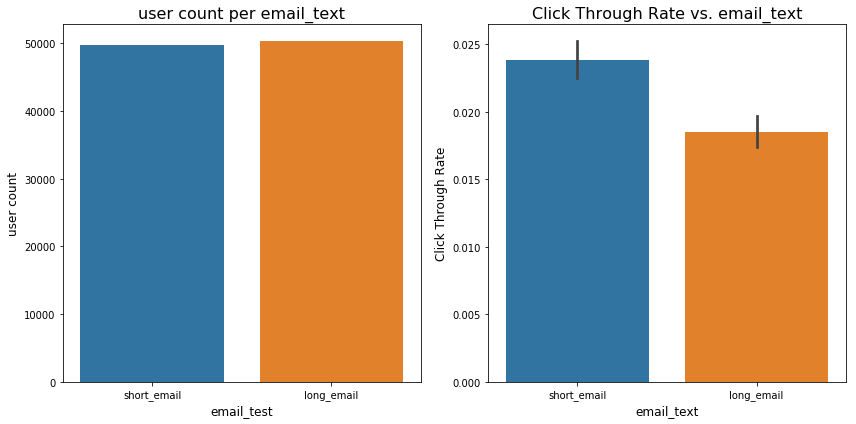

In [18]:
## first to see the distributuion of different email_text
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(12,6))
sns.countplot(x='email_text',data=data,ax=ax[0])
ax[0].set_xlabel('email_test',fontsize=12)
ax[0].set_ylabel('user count',fontsize=12)
ax[0].set_title('user count per email_text',fontsize=16)

sns.barplot(x='email_text', y='click', data=data, ax=ax[1])
ax[1].set_xlabel('email_text', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. email_text', fontsize=16)
plt.tight_layout()
plt.show()

## Email_version Visualization

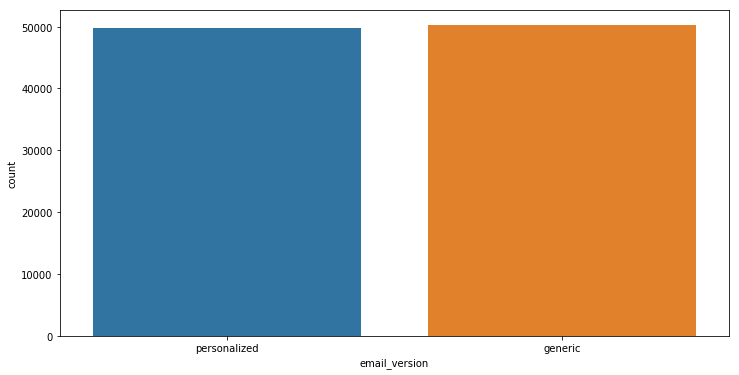

In [15]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='email_version',data=data)
plt.show()

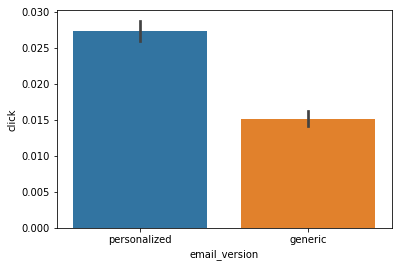

In [16]:
sns.barplot(x='email_version',y='click',data=data)
plt.show()

## Hours visualization

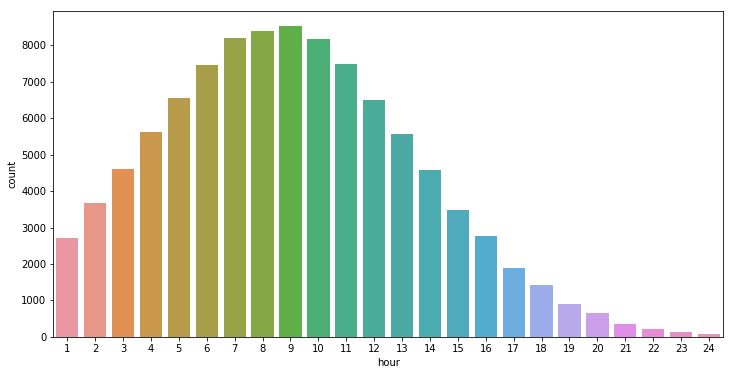

In [60]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='hour',data=data)
plt.show()

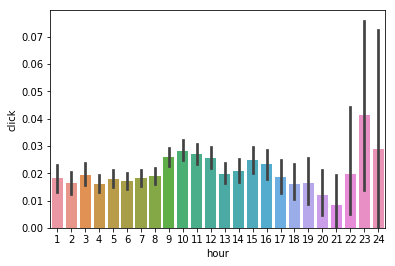

In [61]:
sns.barplot(x='hour',y='click',data=data)
plt.show()

## weekday visualization

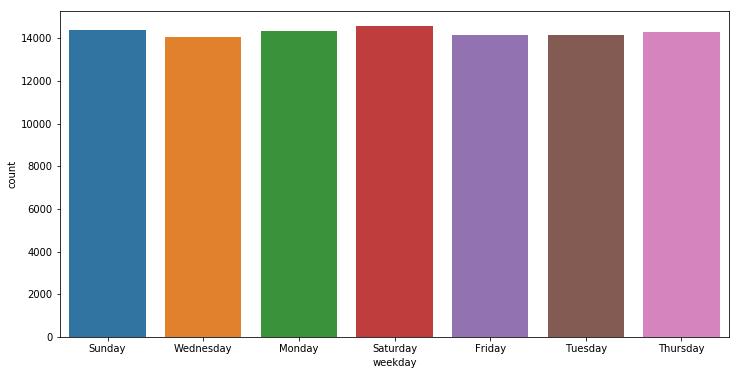

In [62]:
fig,ax=plt.subplots(figsize=(12,6))
sns.countplot(x='weekday',data=data)
plt.show()

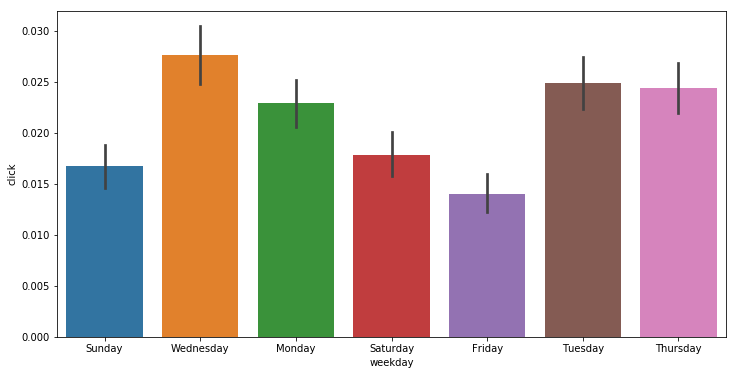

In [63]:
fig,ax=plt.subplots(figsize=(12,6))
sns.barplot(x='weekday',y='click',data=data)
plt.show()

## country visualization

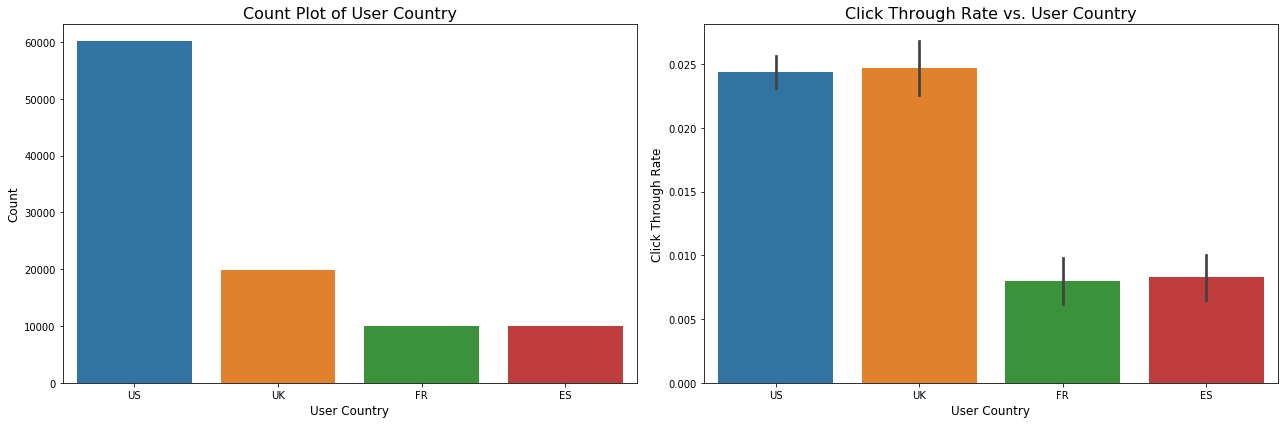

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='user_country', data=data, ax=ax[0])
ax[0].set_xlabel('User Country', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of User Country', fontsize=16)

sns.barplot(x='user_country', y='click', data=data, ax=ax[1])
ax[1].set_xlabel('User Country', fontsize=12)
ax[1].set_ylabel('Click Through Rate', fontsize=12)
ax[1].set_title('Click Through Rate vs. User Country', fontsize=16)
plt.tight_layout()
plt.show()

# Building prediction model

In [19]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_151"; Java(TM) SE Runtime Environment (build 1.8.0_151-b12); Java HotSpot(TM) 64-Bit Server VM (build 25.151-b12, mixed mode)
  Starting server from /anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/z3/_nxc36ms32n5nd5tsc7vmklc0000gn/T/tmp_ldmw4qk
  JVM stdout: /var/folders/z3/_nxc36ms32n5nd5tsc7vmklc0000gn/T/tmp_ldmw4qk/h2o_Daniel1020_started_from_python.out
  JVM stderr: /var/folders/z3/_nxc36ms32n5nd5tsc7vmklc0000gn/T/tmp_ldmw4qk/h2o_Daniel1020_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,09 secs
H2O cluster timezone:,America/New_York
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.2
H2O cluster version age:,"7 days, 17 hours and 20 minutes"
H2O cluster name:,H2O_from_python_Daniel1020_qgwe3z
H2O cluster total nodes:,1
H2O cluster free memory:,910 Mb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [20]:
h2o_df=H2OFrame(data)
h2o_df['click']=h2o_df['click'].asfactor()

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [22]:
h2o_df.head()

email_id,email_text,email_version,hour,weekday,user_country,user_past_purchases,open,click
85120,short_email,personalized,2,Sunday,US,5,0,0
966622,long_email,personalized,12,Sunday,UK,2,1,1
777221,long_email,personalized,11,Wednesday,US,2,0,0
493711,short_email,generic,6,Monday,UK,1,0,0
106887,long_email,generic,14,Monday,US,6,0,0
684440,long_email,personalized,6,Sunday,UK,3,0,0
139620,short_email,personalized,9,Saturday,US,8,1,0
694933,long_email,generic,8,Saturday,US,2,0,0
485760,long_email,personalized,5,Monday,US,4,0,0
592665,short_email,personalized,23,Wednesday,US,3,0,0


In [24]:
strat_split=h2o_df['click'].stratified_split(test_frac=0.3,seed=42)

train=h2o_df[strat_split=='train']
test=h2o_df[strat_split=='test']

feature = ['email_text','email_version','hour','weekday','user_country','user_past_purchases']
target ='click'

In [29]:
#build random forest model
model=H2ORandomForestEstimator(balance_classes=True,ntrees=100,max_depth=10,
                              mtries=-1,seed=42,score_each_iteration=True)
model.train(x=feature,y=target,training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


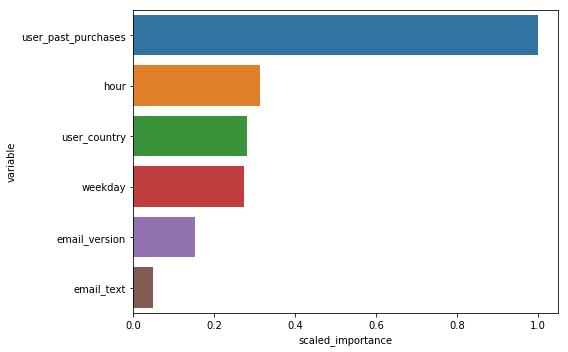

In [31]:
importance = model.varimp(use_pandas=True)

fig,ax=plt.subplots(figsize=(8,5))
sns.barplot(x='scaled_importance',y='variable',data=importance)
plt.tight_layout()
plt.show()

In [38]:
## predict 
train_true=train.as_data_frame()['click'].values
test_true=test.as_data_frame()['click'].values
train_pred=model.predict(train).as_data_frame()['p1'].values
test_pred=model.predict(test).as_data_frame()['p1'].values

train_fpr, train_tpr, _ = roc_curve(train_true, train_pred)
test_fpr, test_tpr, _ = roc_curve(test_true, test_pred)
train_auc = np.round(auc(train_fpr, train_tpr), 3)
test_auc = np.round(auc(test_fpr, test_tpr), 3)



drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%


In [39]:
print(classification_report(y_true=test_true,y_pred=(test_pred>0.5).astype(int)))

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.98      1.00      0.99     29364
           1       0.00      0.00      0.00       636

   micro avg       0.98      0.98      0.98     30000
   macro avg       0.49      0.50      0.49     30000
weighted avg       0.96      0.98      0.97     30000



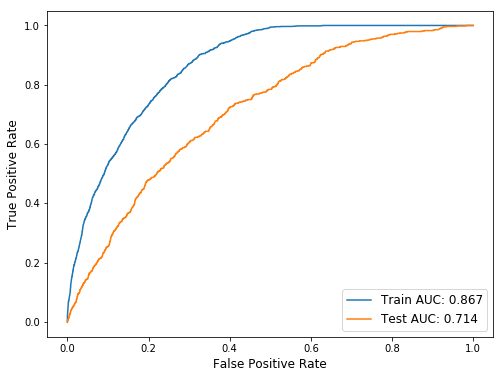

In [41]:

# ROC curves
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(train_fpr, train_tpr, label='Train AUC: ' + str(train_auc))
ax.plot(test_fpr, test_tpr, label='Test AUC: ' + str(test_auc))
ax.set_xlabel('False Positive Rate', fontsize=12)
ax.set_ylabel('True Positive Rate', fontsize=12)
ax.legend(fontsize=12)
plt.show()

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


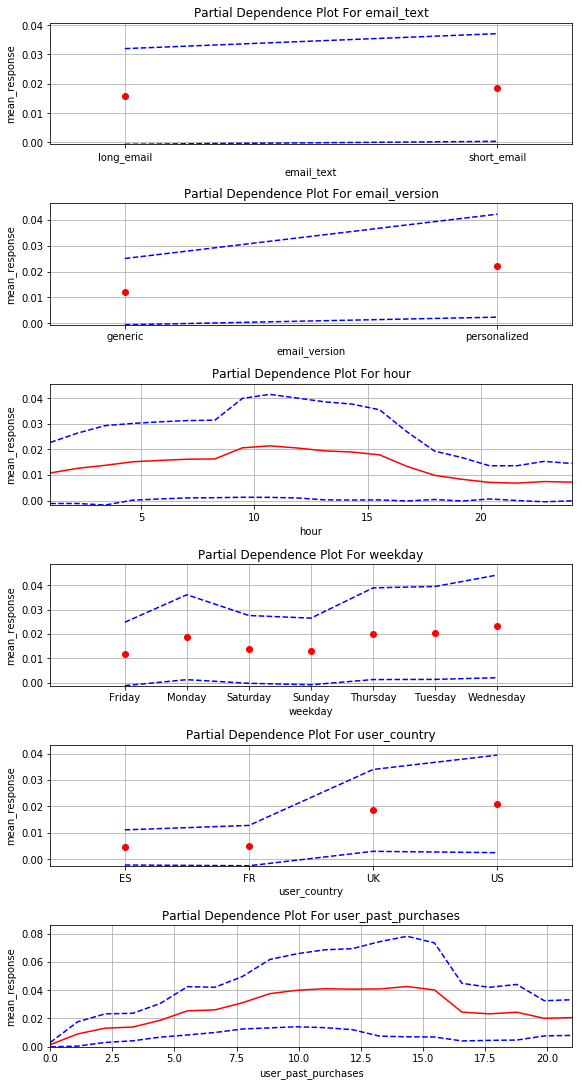

In [42]:
# Partial dependence plot
_ = model.partial_plot(train, cols=feature, figsize=(8, 15))

In [48]:
open_table.email_id

NameError: name 'open_table' is not defined